<a href="https://colab.research.google.com/github/homosapienssapiens/feature-engineering/blob/main/Final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto final - Ingeniería de características
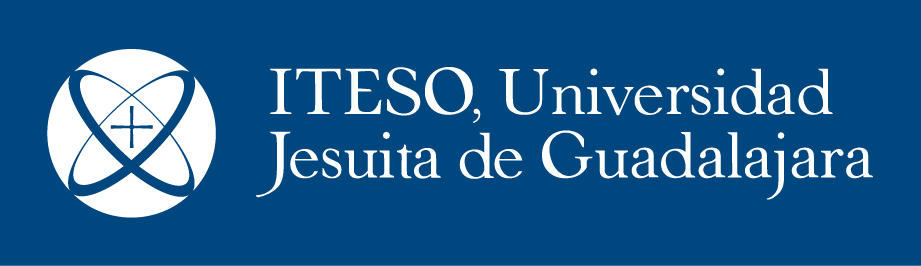  
- Miguel Angel Solis Orozco  
- Cesar Contreras González  


---


Ingeniería de características  
Instituto de Estudios Superiores de Occidente  
Prof: Dr. Carlos Augusto Arellano Muro

---



##1. Separe las variables x1 y x2 en columnas diferentes.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import numpy as np
from scipy.optimize import minimize_scalar
from sklearn.tree import DecisionTreeRegressor
import collections as coll

In [ ]:
route = "/content/drive/MyDrive/Maestría en ciencia de datos/2do semestre/Ingeniería de características/Trabajo final/"
df = pd.read_csv(route + "data-1.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91
...,...,...,...
6566,x2,27/12/2014,-13.30
6567,x2,28/12/2014,16.20
6568,x2,29/12/2014,5.10
6569,x2,30/12/2014,4.90


Analizando el DataFrame podemos ver que las fechas no se encuentran en el formato fecha correcto. A continuación pondremos el formato a date time.

In [ ]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df

,nombre,Fecha,data
0,x1,2006-01-01,6.05
1,x1,2006-01-02,4.72
2,x1,2006-01-03,4.46
3,x1,2006-01-04,34.74
4,x1,2006-01-05,1.91
...,...,...,...
6566,x2,2014-12-27,-13.30
6567,x2,2014-12-28,16.20
6568,x2,2014-12-29,5.10
6569,x2,2014-12-30,4.90


Creación de nuevo data frame con separación de la columna 'dato' en las columnas 'x1' y 'x2' dependiendo del valor de la columna 'nombre'.

In [ ]:
dfx1 = df[df.nombre=='x1']
dfx2 = df[df.nombre=='x2']

# Merge de los dos df por columna de fecha
dfsplit = pd.merge(dfx1, dfx2, on='Fecha', suffixes=('_x1', '_x2'), how='outer')
dfsplit

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01,6.05,x2,9.22
1,x1,2006-01-02,4.72,x2,1.14
2,x1,2006-01-03,4.46,x2,-13.46
3,x1,2006-01-04,34.74,x2,3.33
4,x1,2006-01-05,1.91,x2,-0.14
...,...,...,...,...,...
3282,x1,2014-12-27,13.16,x2,-13.30
3283,x1,2014-12-28,8.50,x2,16.20
3284,x1,2014-12-29,11.03,x2,5.10
3285,x1,2014-12-30,21.33,x2,4.90


##2. Elija y justifique un método de imputación de datos para los datos perdidos y los datos menores o iguales que cero.

In [ ]:
#HAcemos un nuevo data framepara llenar
dffull = dfsplit

Veamos primero la forma de las series de tiempo por pura curiosidad.

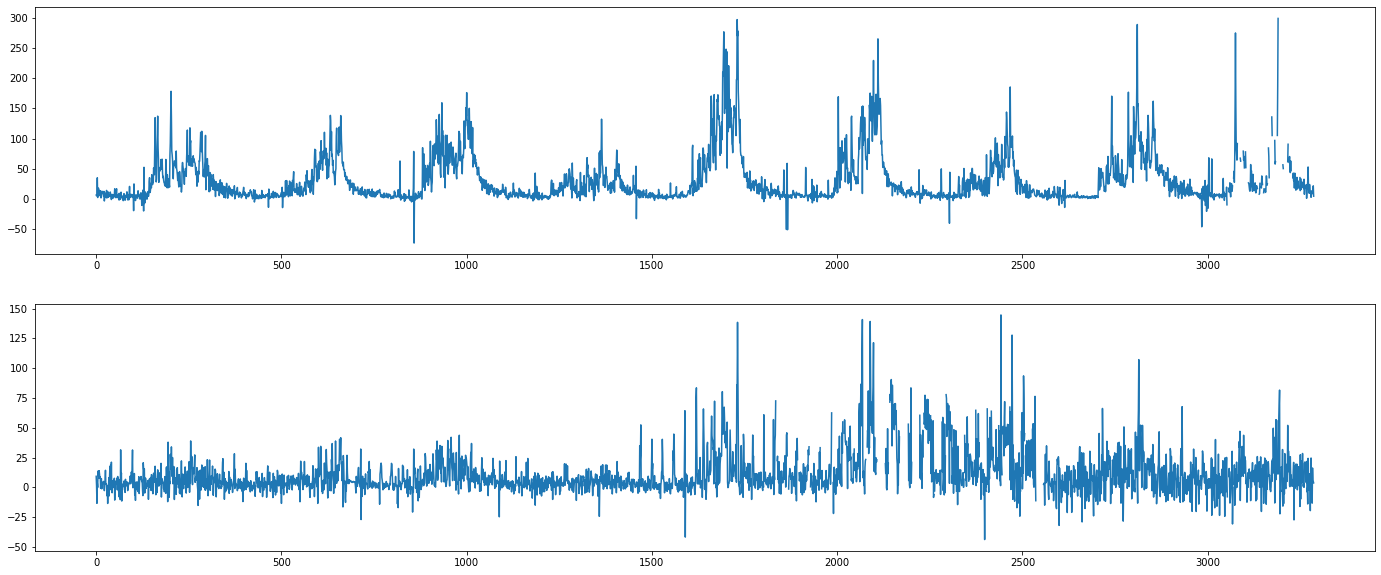

In [ ]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.plot(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.plot(dffull['data_x2'])

(array([   8.,  169., 2040.,  624.,  181.,   82.,   39.,    7.,    5.,
           5.]),
 array([-43.89 , -25.031,  -6.172,  12.687,  31.546,  50.405,  69.264,
         88.123, 106.982, 125.841, 144.7  ]),
 <a list of 10 Patch objects>)

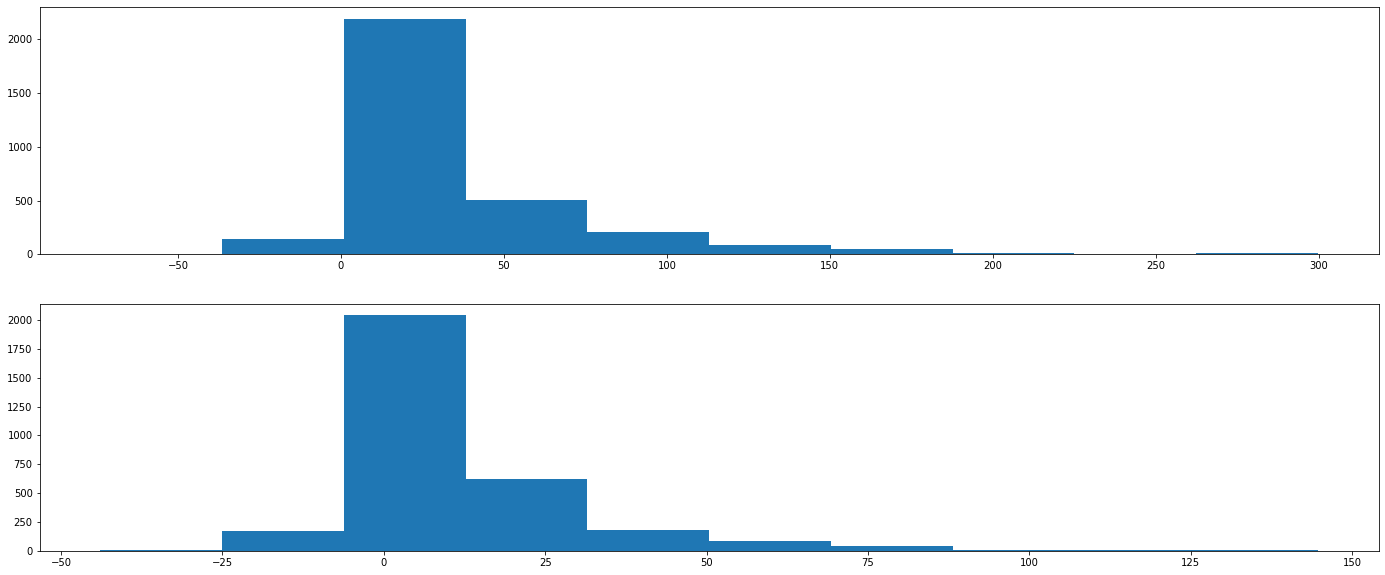

In [ ]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.hist(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.hist(dffull['data_x2'])

In [ ]:
dffull.describe()

,data_x1,data_x2
count,3202.000000,3160.000000
mean,30.882717,10.930712
std,39.399464,17.848627
min,-73.790000,-43.890000
25%,5.642500,1.397500
50%,15.140000,6.000000
75%,42.375000,14.912500
max,299.740000,144.700000


###Valores NaN  
He decidido reemplazar los valores NaN con un número random sacado de las mismas columnas respectivas. Se hará con random.choices() para respetar la distribución.

In [ ]:
#Cantidadd de valorres NaN antes del reemplazo.
print('La cantidad de valores NaN en x1 es: ' + str(dffull['data_x1'].isna().sum()))
print('La cantidad de valores NaN en x2 es: ' + str(dffull['data_x2'].isna().sum()))

La cantidad de valores NaN en x1 es: 85
La cantidad de valores NaN en x2 es: 127


In [ ]:
# Función para limpiar los nan de una serie y sustituírlos por un avlor de la misma. 
def narep (sna, cna):
  while sna[cna].isna().any():
    for i, j in enumerate(sna[cna]):
      if j != j:
        #print(i)
        sna[cna][i] = random.choice(sna[cna])
  return sna[cna]

In [ ]:
dffull['data_x1'] = narep(dffull, 'data_x1')
dffull['data_x2'] = narep(dffull, 'data_x2')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
#Llenado de valores NaN de x1 y x2 con su mediana.
# = dffull['data_x1'].fillna(np.random.choice(dffull['data_x1']))
#dffull['data_x2'] = dffull['data_x2'].fillna(np.random.choice(dffull['data_x2']))

In [ ]:
#Cantidadd de valorres NaN después del reemplazo.
print('La cantidad de valores NaN en x1 es: ' + str(dffull['data_x1'].isna().sum()))
print('La cantidad de valores NaN en x2 es: ' + str(dffull['data_x2'].isna().sum()))

La cantidad de valores NaN en x1 es: 0
La cantidad de valores NaN en x2 es: 0


In [ ]:
dffull['data_x1'].isna().any()

False

In [ ]:
for i, j in enumerate(dffull['data_x2']):
  if j != j:
    print(i)

###Valores iguales o menores a cero.  
He decidido usar la transformación yeo johnson para poder eliminar los valores atípicos, invertir y poder desplazar la serie de tiempo a puros datos positivos.

In [ ]:
#Cantidad de valores igual o menor a cero en x1 y x2 antes del reemplazo.
print('La cantidad de valores igual o mayores a 0 para x1 es: ' + str(sum(dffull['data_x1'] <= 0)))
print('La cantidad de valores igual o mayores a 0 para x2 es: ' + str(sum(dffull['data_x2'] <= 0)))

La cantidad de valores igual o mayores a 0 para x1 es: 100
La cantidad de valores igual o mayores a 0 para x2 es: 611


Primero transformamos los datos para poder tener una distribución normal.

In [ ]:
dffull['data_x1'], l1 = stats.yeojohnson(dffull['data_x1'])
dffull['data_x2'], l2 = stats.yeojohnson(dffull['data_x2'])
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01,4.349648,x2,6.926495
1,x1,2006-01-02,3.537236,x2,1.053869
2,x1,2006-01-03,3.372792,x2,-19.171959
3,x1,2006-01-04,17.435508,x2,2.823278
4,x1,2006-01-05,1.621415,x2,-0.141752
...,...,...,...,...,...
3282,x1,2014-12-27,8.166656,x2,-18.909703
3283,x1,2014-12-28,5.747260,x2,11.233203
3284,x1,2014-12-29,7.092276,x2,4.127898
3285,x1,2014-12-30,11.948807,x2,3.984417


In [ ]:
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01,4.349648,x2,6.926495
1,x1,2006-01-02,3.537236,x2,1.053869
2,x1,2006-01-03,3.372792,x2,-19.171959
3,x1,2006-01-04,17.435508,x2,2.823278
4,x1,2006-01-05,1.621415,x2,-0.141752
...,...,...,...,...,...
3282,x1,2014-12-27,8.166656,x2,-18.909703
3283,x1,2014-12-28,5.747260,x2,11.233203
3284,x1,2014-12-29,7.092276,x2,4.127898
3285,x1,2014-12-30,11.948807,x2,3.984417


In [ ]:
print(dffull[dffull['data_x1'] <= 100.0].index) 

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3277, 3278, 3279, 3280, 3281, 3282, 3283, 3284, 3285, 3286],
           dtype='int64', length=3287)


Ahora quitamos todo lo que esté fuera de 3 veces el rango intercuartílico.

In [ ]:
#Obtención del el cuantil1, el cuantil 3 y el rango intercuantlico.
Q1 = dffull['data_x1'].quantile(0.25)
Q3 = dffull['data_x1'].quantile(0.75)
riq = Q3 - Q1
maxi = Q3 + riq * 1.5
mini = Q1 - riq * 1.5

#dffull.loc[dffull['data_x1'] >= max, ["data_x1"]] = random.uniform(Q1, Q3)
#dffull.loc[dffull['data_x1'] <= min, ["data_x1"]] = random.uniform(Q1, Q3)

#dffull['data_x1'].replace(dffull['data_x1'] >= max, random.uniform(Q1, Q3))
#dffull['data_x1'].replace(dffull['data_x1'] <= min, random.uniform(Q1, Q3))

for i in dffull['data_x1']:
  if i >= maxi or i <= mini:
    dffull[dffull['data_x1'] == i] = random.uniform(Q1, Q3)
    

In [ ]:
dffull.loc[dffull['data_x1'] >= maxi, ["data_x1"]]

,data_x1


In [ ]:
dffull.loc[dffull['data_x1'] <= mini, ["data_x1"]]

,data_x1


In [ ]:
#Obtención del el cuantil1, el cuantil 3 y el rango intercuantlico.
Q1 = dffull['data_x2'].quantile(0.25)
Q3 = dffull['data_x2'].quantile(0.75)
riq = Q3 - Q1
maxi = Q3 + riq * 1.5
mini = Q1 - riq * 1.5

#dffull.loc[dffull['data_x2'] >= maxi, ["data_x2"]] = random.uniform(Q1, Q3)
#dffull.loc[dffull['data_x2'] <= mini, ["data_x2"]] = random.uniform(Q1, Q3)

#dffull['data_x2'].replace(dffull['data_x2'] >= maxi, random.uniform(Q1, Q3))
#dffull['data_x2'].replace(dffull['data_x2'] <= mini, random.uniform(Q1, Q3))

for i in dffull['data_x2']:
  if i >= maxi or i <= mini:
    dffull[dffull['data_x2'] == i] = random.uniform(Q1, Q3)

In [ ]:
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01 00:00:00,4.349648,x2,6.926495
1,x1,2006-01-02 00:00:00,3.537236,x2,1.053869
2,10.107,10.107,10.107027,10.107,10.107027
3,x1,2006-01-04 00:00:00,17.435508,x2,2.823278
4,x1,2006-01-05 00:00:00,1.621415,x2,-0.141752
...,...,...,...,...,...
3282,4.21098,4.21098,4.210980,4.21098,4.210980
3283,x1,2014-12-28 00:00:00,5.747260,x2,11.233203
3284,x1,2014-12-29 00:00:00,7.092276,x2,4.127898
3285,x1,2014-12-30 00:00:00,11.948807,x2,3.984417


A continuación hacemos la inversa.

In [ ]:
# Función para obtener la inversa de las transformaciones Yeo-Johnson.
def inverseyj(xdef, lam):
  xo = []
  for i in xdef:
    if i >= 0 and lam != 0:
      xo.append((i * lam + 1) ** (1 / lam) - 1)
    else:
      if i >= 0 and lam == 0:
        xo.append(np.exp(i) - 1)
      else:
        if i < 0 and lam != 2:
          xo.append( 1 - (-(2 - lam) * i + 1) ** (1 / (2 - lam)))
        else:
          if i < 0 and lam == 2:
            xo.append(1 - np.exp(i))
  return xo

In [ ]:
dffull['data_x1'] = inverseyj(dffull['data_x1'], l1)
dffull['data_x2'] = inverseyj(dffull['data_x2'], l2)

In [ ]:
dffull

,nombre_x1,Fecha,data_x1,nombre_x2,data_x2
0,x1,2006-01-01 00:00:00,51.560554,x2,32.390313
1,x1,2006-01-02 00:00:00,49.241877,x2,21.517586
2,10.107,10.107,68.751747,10.107,38.583953
3,x1,2006-01-04 00:00:00,92.375912,x2,24.708947
4,x1,2006-01-05 00:00:00,43.886568,x2,19.407031
...,...,...,...,...,...
3282,4.21098,4.21098,51.162821,4.21098,27.264834
3283,x1,2014-12-28 00:00:00,55.613605,x2,40.822458
3284,x1,2014-12-29 00:00:00,59.588557,x2,27.110561
3285,x1,2014-12-30 00:00:00,74.514770,x2,26.844502


Por último desplazamos todos los valores a positivos.

In [ ]:
#Desplazamiento de x1 a positivos
x1dif = -np.min(dffull['data_x1'])
dffull['data_x1'] = dffull['data_x1'] + x1dif + 1

#Desplazamiento de x2 a positivos
x1dif = -np.min(dffull['data_x2'])
dffull['data_x2'] = dffull['data_x2'] + x1dif + 1

In [ ]:
#Cantidad de valores igual o menor a cero en x1 y x2 después del reemplazo.
print('La cantidad de valores igual o menores a 0 para x1 es: ' + str(sum(dffull['data_x1'] <= 0)))
print('La cantidad de valores igual o menores a 0 para x2 es: ' + str(sum(dffull['data_x2'] <= 0)))

La cantidad de valores igual o menores a 0 para x1 es: 0
La cantidad de valores igual o menores a 0 para x2 es: 0


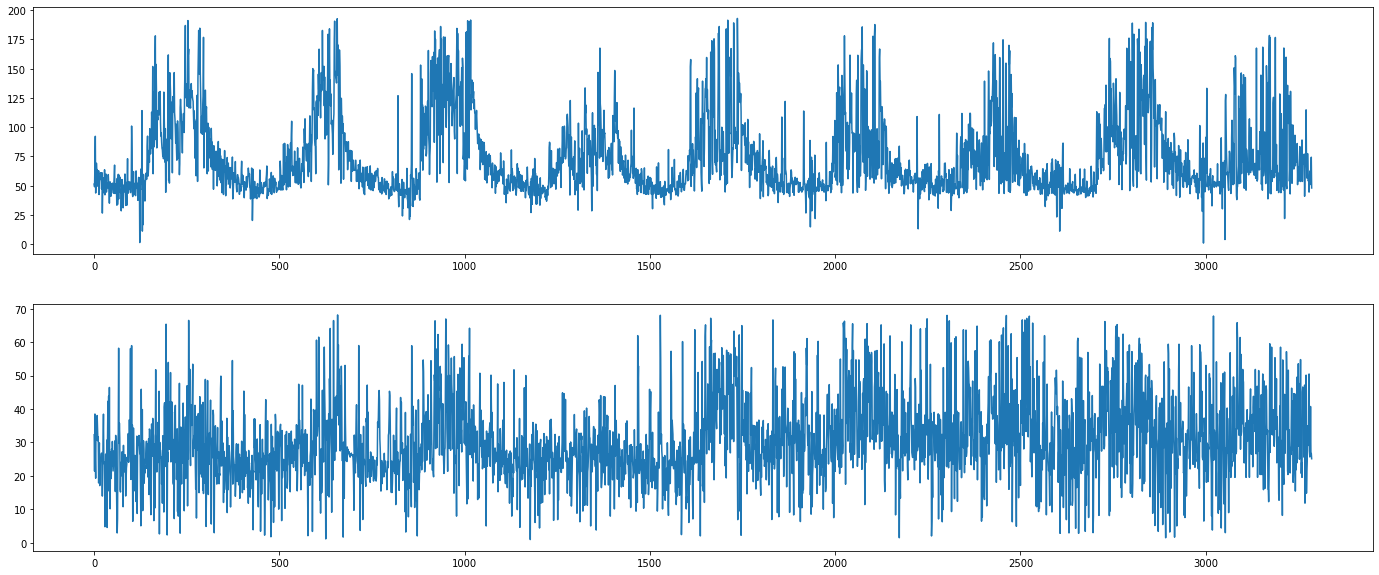

In [ ]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.plot(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.plot(dffull['data_x2'])

Los datos han alterado su distribución, pero ya cumplimos con los requerimientos solicitados en el paso 2.

(array([ 78., 159., 378., 924., 745., 445., 255., 147.,  97.,  59.]),
 array([ 1.        ,  7.70946603, 14.41893206, 21.12839809, 27.83786411,
        34.54733014, 41.25679617, 47.9662622 , 54.67572823, 61.38519426,
        68.09466029]),
 <a list of 10 Patch objects>)

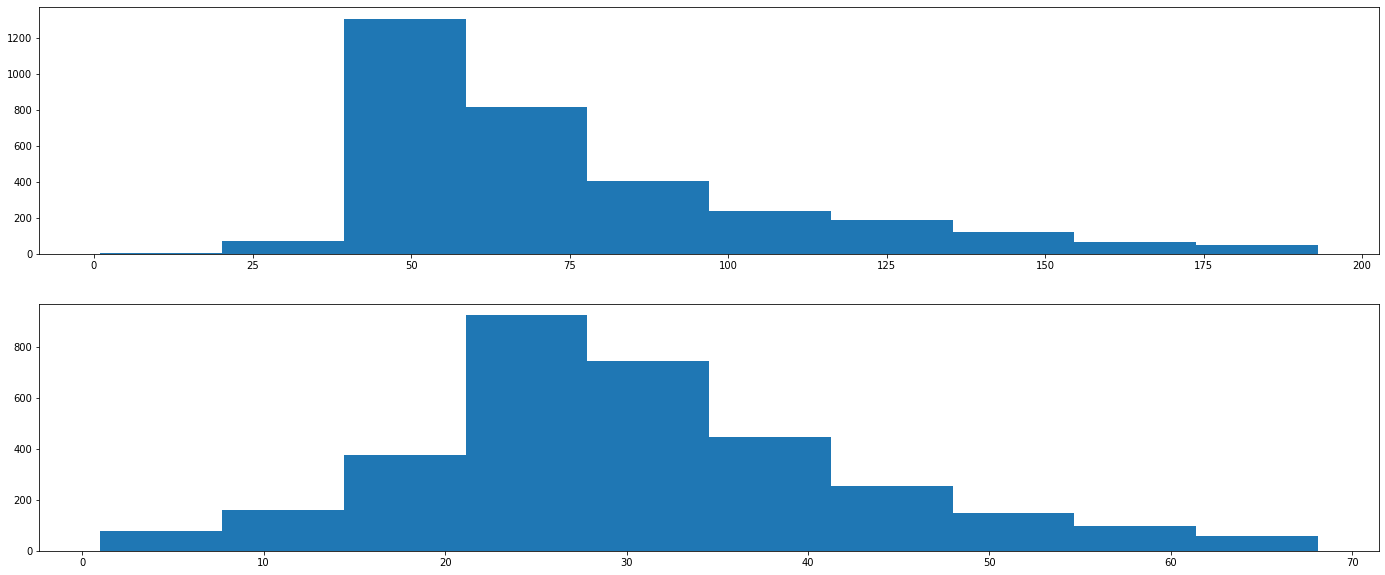

In [ ]:
plt.figure(figsize = [24, 10])
plt.subplot(2, 1, 1)
plt.hist(dffull['data_x1'])
plt.subplot(2, 1, 2)
plt.hist(dffull['data_x2'])

##3. Encuentre un shapelet de longitud 365 y otro de longitud 1460 para cada variable.

In [ ]:
def C(a,b):
  m=min(len(a),len(b))
  n=max(len(a),len(b))

  # nos aseguramos de que 'b' tenga la longitud más grande
  if len(b)<len(a):
    b1=a
    a=b
    b=b1
  Corr=np.inf
  for l in range(n-m+1):
    Corr=min(Corr,(np.sum(a*b[l:l+m])-m*np.mean(a)*np.mean(b))/(m*np.std(a)*np.std(b)))
  return Corr

In [ ]:
def d(a,b):
  x=stats.zscore(a)
  y=stats.zscore(b)
  return np.sqrt(2*(1-C(x,y)))

In [ ]:
r = 0

In [ ]:
def obj(u,serie,w=r):
  u=int(round(u))
  s=pd.DataFrame(serie[u:u+w])
  x=serie.values
  y=s.values
  return d(x,y)

In [ ]:
# Función para shapelet
# Parámetros:
# ts: Serie de tiempo
# r: Rango 
def shapelet (ts, r):
  #w = random.randint(0, len(ts) - r)
  s = random.randint(0, len(ts) - r)
  shapelet = pd.DataFrame(ts[s:s + r])
  x=ts.values
  y=shapelet.values
  sol = minimize_scalar(obj,bounds=[0, len(ts)-r],method='bounded',args=(ts,))
  u = int(round(sol.x))
  res = pd.DataFrame(ts[u:u+r])
  plt.plot(shapelet)
  plt.plot(res)
  return shapelet

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy

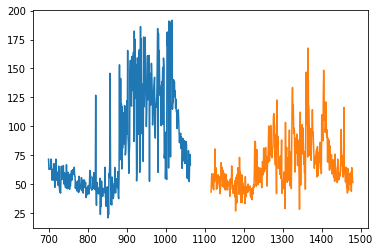

In [ ]:
x1365 = shapelet(dffull['data_x1'], 365)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy

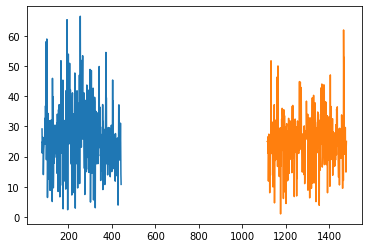

In [ ]:
x2365 = shapelet(dffull['data_x2'], 365)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy

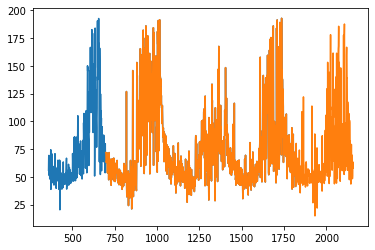

In [ ]:
x11460 = shapelet(dffull['data_x1'], 1460)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2416: RuntimeWarning: Mean of empty slice.
  mns = a.mean(axis=axis, keepdims=True)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy

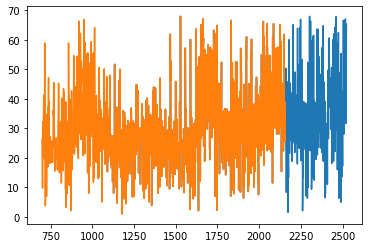

In [ ]:
x21460 = shapelet(dffull['data_x2'], 1460)

##4. Siendo el shapelet de 365 el identificador de la clase cero y el shapelet de 1460 el identificador de clase uno. Entrene un Árbol de decisión para clasificar ambas variables y mencione la frecuencia de cada una (En caso de traslape de clases, la clase cero tiene prioridad).

Concatenaremos x1 donde el shapelet de 365 es la clase 0 y el shapelet de 1460 es la clase 1.

In [ ]:
# Asignamos el distintivo cero para el primer shapelet
x1365['class']=np.zeros(len(x1365))

# Asignamos el distintivo uno para el segundo shapelet
x11460['class']=np.ones(len(x11460))

In [ ]:
x1365

,data_x1,class
699,71.821694,0.0
700,63.114989,0.0
701,63.040575,0.0
702,63.604988,0.0
703,63.233957,0.0
...,...,...
1059,68.078447,0.0
1060,52.408909,0.0
1061,67.805640,0.0
1062,75.844898,0.0


In [ ]:
x11460

,data_x1,class
360,55.993712,1.0
361,67.431522,1.0
362,69.364198,1.0
363,53.657076,1.0
364,51.255565,1.0
...,...,...
1815,53.657076,1.0
1816,59.579243,1.0
1817,50.860296,1.0
1818,58.358099,1.0


In [ ]:
treex1 = pd.DataFrame(data=np.concatenate([x1365.values,x11460.values]),columns=x1365.columns)
treex1

,data_x1,class
0,71.821694,0.0
1,63.114989,0.0
2,63.040575,0.0
3,63.604988,0.0
4,63.233957,0.0
...,...,...
1820,53.657076,1.0
1821,59.579243,1.0
1822,50.860296,1.0
1823,58.358099,1.0


Concatenaremos x2 donde el shapelet de 365 es la clase 0 y el shapelet de 1460 es la clase 1.

In [ ]:
# Asignamos el distintivo cero para el primer shapelet
x2365['class']=np.zeros(len(x2365))

# Asignamos el distintivo uno para el segundo shapelet
x21460['class']=np.ones(len(x21460))

In [ ]:
x2365

,data_x2,class
79,29.136179,0.0
80,21.127686,0.0
81,24.935796,0.0
82,24.477494,0.0
83,26.365001,0.0
...,...,...
439,26.028323,0.0
440,31.046839,0.0
441,24.491455,0.0
442,14.184275,0.0


In [ ]:
x21460

,data_x2,class
1064,25.825294,1.0
1065,30.528605,1.0
1066,31.411739,1.0
1067,34.263628,1.0
1068,35.847624,1.0
...,...,...
2519,44.300752,1.0
2520,49.822773,1.0
2521,31.687686,1.0
2522,56.954041,1.0


In [ ]:
treex2 = pd.DataFrame(data=np.concatenate([x2365.values,x21460.values]),columns=x2365.columns)
treex2

,data_x2,class
0,29.136179,0.0
1,21.127686,0.0
2,24.935796,0.0
3,24.477494,0.0
4,26.365001,0.0
...,...,...
1820,44.300752,1.0
1821,49.822773,1.0
1822,31.687686,1.0
1823,56.954041,1.0


A continuación ajustaremos y entrenaremos el modelo de arbol de decisión para obtener las predicciones.

#x1

In [ ]:
dtr=DecisionTreeRegressor(max_leaf_nodes=20)

In [ ]:
treex1['Period']=treex1.index
treex1

,data_x1,class,Period
0,71.821694,0.0,0
1,63.114989,0.0,1
2,63.040575,0.0,2
3,63.604988,0.0,3
4,63.233957,0.0,4
...,...,...,...
1820,53.657076,1.0,1820
1821,59.579243,1.0,1821
1822,50.860296,1.0,1822
1823,58.358099,1.0,1823


In [ ]:
dtr.fit(treex1[['Period']],treex1['data_x1'])
treex1['tree']=dtr.predict(treex1[['Period']])
treex1.head()

,data_x1,class,Period,tree
0,71.821694,0.0,0,52.044637
1,63.114989,0.0,1,52.044637
2,63.040575,0.0,2,52.044637
3,63.604988,0.0,3,52.044637
4,63.233957,0.0,4,52.044637


In [ ]:
treex1['tree'].unique()

array([ 52.04463684, 100.85579822, 129.33705014,  82.42371081,
        55.94560715,  82.41684961, 124.70254205,  74.70481666,
        51.3820446 ,  75.68782056,  53.24885802,  72.57047099,
        89.74336538,  65.30813442,  50.53247177,  75.61553552,
       101.59437993,  67.1530201 ])

Cómo están distribuídas las decisiones a lo largo de x1.

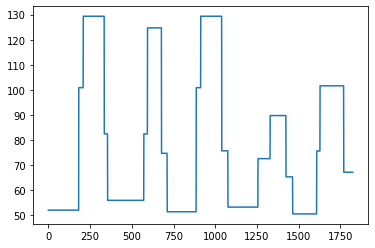

In [ ]:
plt.plot(treex1['tree'])

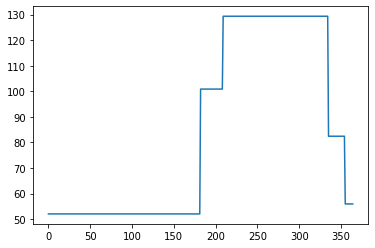

In [ ]:
plt.plot(treex1['tree'][treex2['class'] == 0.0])

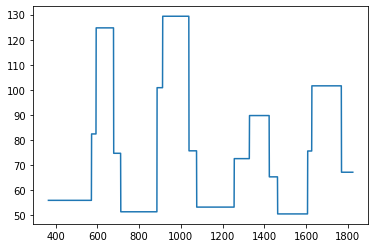

In [ ]:
plt.plot(treex1['tree'][treex2['class'] == 1.0])

In [ ]:
frecx1c0 = coll.Counter(treex1['tree'][treex1['class'] == 0.0])
frecx1c1 = coll.Counter(treex1['tree'][treex1['class'] == 1.0])

Frecuencia de valores en x1.

Clase 0

In [ ]:
frecx1c0

Counter({52.04463684430967: 182,
         55.94560715275112: 10,
         82.42371080691278: 20,
         100.85579821971784: 27,
         129.33705014024602: 126})

Clase 1

In [ ]:
frecx1c1

Counter({50.53247176730938: 144,
         51.38204459559577: 174,
         53.24885801905315: 180,
         55.94560715275112: 207,
         65.30813442066865: 40,
         67.1530201014301: 55,
         72.57047098606265: 73,
         74.70481666008541: 34,
         75.61553552357455: 20,
         75.68782056057212: 37,
         82.4168496128742: 22,
         89.74336537941466: 95,
         100.85579821971784: 27,
         101.5943799321477: 142,
         124.7025420458898: 84,
         129.33705014024602: 126})

Tabla de frecuencias de valores de x1.

In [ ]:
frecx1 = dict(list(frecx1c1.items()) + list(frecx1c0.items()))

En la siguiente tabla podemos ver que le estamos dando preferencia a la clase 0.

In [ ]:
frecx1

{50.53247176730938: 144,
 51.38204459559577: 174,
 52.04463684430967: 182,
 53.24885801905315: 180,
 55.94560715275112: 10,
 65.30813442066865: 40,
 67.1530201014301: 55,
 72.57047098606265: 73,
 74.70481666008541: 34,
 75.61553552357455: 20,
 75.68782056057212: 37,
 82.4168496128742: 22,
 82.42371080691278: 20,
 89.74336537941466: 95,
 100.85579821971784: 27,
 101.5943799321477: 142,
 124.7025420458898: 84,
 129.33705014024602: 126}

Distribución de x1 dando prioridad a clase 0.

<BarContainer object of 18 artists>

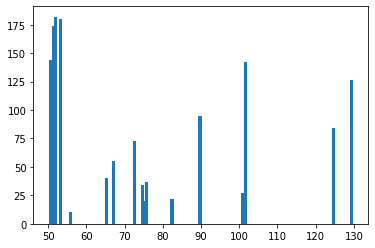

In [ ]:
plt.bar(frecx1.keys(), frecx1.values())

#X2

In [ ]:
treex2['Period']=treex2.index
treex2

,data_x2,class,Period,tree
0,29.136179,0.0,0,25.921398
1,21.127686,0.0,1,25.921398
2,24.935796,0.0,2,25.921398
3,24.477494,0.0,3,25.921398
4,26.365001,0.0,4,25.921398
...,...,...,...,...
1820,44.300752,1.0,1820,48.371749
1821,49.822773,1.0,1821,48.371749
1822,31.687686,1.0,1822,48.371749
1823,56.954041,1.0,1823,48.371749


In [ ]:
dtr.fit(treex2[['Period']],treex2['data_x2'])
treex2['tree']=dtr.predict(treex2[['Period']])
treex2.head()

,data_x2,class,Period,tree
0,29.136179,0.0,0,25.921398
1,21.127686,0.0,1,25.921398
2,24.935796,0.0,2,25.921398
3,24.477494,0.0,3,25.921398
4,26.365001,0.0,4,25.921398


In [ ]:
treex2['tree'].unique()

array([25.92139784, 30.35464553, 25.09980259, 41.798517  , 52.22519031,
       13.43319114, 45.7201739 , 30.05845467, 63.87184531, 41.65757526,
       35.27300251, 51.6087847 , 41.87371016, 31.79849768, 43.82708974,
       35.91683996, 23.47167538, 39.87609323, 31.5265998 , 48.37174937])

Cómo están distribuídas las decisiones a lo largo de x2.

Clase 0

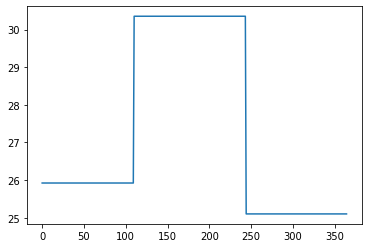

In [ ]:
plt.plot(treex2['tree'][treex2['class'] == 0.0])

Clase 1

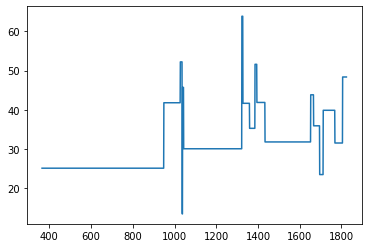

In [ ]:
plt.plot(treex2['tree'][treex2['class'] == 1.0])

Clase 0 y 1

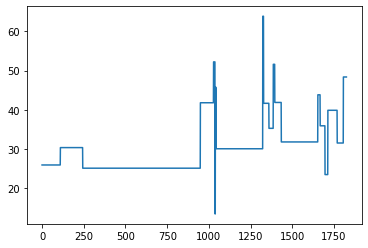

In [ ]:
plt.plot(treex2['tree'])

In [ ]:
valx2 = treex2['tree'].unique()
frecx2 = coll.Counter(treex2['tree'])

Frecuencia de valores en x2.

In [ ]:
frecx2c0 = coll.Counter(treex2['tree'][treex2['class'] == 0.0])
frecx2c1 = coll.Counter(treex2['tree'][treex2['class'] == 1.0])

In [ ]:
frecx2c0

Counter({25.099802587586026: 121,
         25.92139783703223: 110,
         30.354645530821397: 134})

In [ ]:
frecx2c1

Counter({13.433191142993163: 2,
         23.47167537831958: 17,
         25.099802587586026: 584,
         30.058454670845556: 279,
         31.526599800195974: 37,
         31.798497675204455: 219,
         35.273002511828025: 26,
         35.91683995840511: 29,
         39.87609323455114: 56,
         41.657575260238: 32,
         41.79851700368714: 79,
         41.873710157193045: 39,
         43.82708974023869: 14,
         45.720173898263596: 5,
         48.37174937103787: 19,
         51.60878470070847: 9,
         52.22519030533428: 9,
         63.87184531223569: 5})

Tabla de frecuencias de valores de x2.

In [ ]:
frecx2 = dict(list(frecx2c1.items()) + list(frecx2c0.items()))

En la siguiente tabla podemos ver que le estamos dando preferencia a la clase 0.

{13.433191142993163: 2,
 23.47167537831958: 17,
 25.099802587586026: 121,
 25.92139783703223: 110,
 30.058454670845556: 279,
 30.354645530821397: 134,
 31.526599800195974: 37,
 31.798497675204455: 219,
 35.273002511828025: 26,
 35.91683995840511: 29,
 39.87609323455114: 56,
 41.657575260238: 32,
 41.79851700368714: 79,
 41.873710157193045: 39,
 43.82708974023869: 14,
 45.720173898263596: 5,
 48.37174937103787: 19,
 51.60878470070847: 9,
 52.22519030533428: 9,
 63.87184531223569: 5}

Distribución de x2 dando prioridad a clase 0.

<BarContainer object of 20 artists>

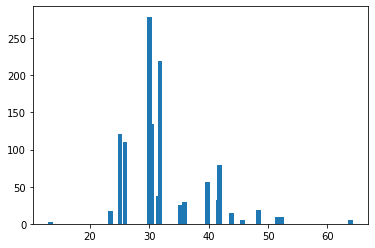

In [ ]:
plt.bar(frecx2.keys(), frecx2.values())

###Fin
Codeado por MIguel Angel Solis Orozco y Cesar Contreras González.